<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

Load a pretrained network from TensorFlow Hub, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
images = ...  # A batch of images with shape [batch_size, height, width, 3].
logits = module(images)  # Logits with shape [batch_size, num_classes].
```

Apply it to classify the images downloaded below (images from a search for animals in national parks):

## Downloads

In [1]:
!pip install google_images_download

In [2]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 20,
             "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal national park
Evaluating...
Starting Download...
Image URL: https://k6u8v6y8.stackpathcdn.com/blog/wp-content/uploads/2017/06/Royal-Bengal-Tiger.jpg
Completed Image ====> 1.Royal-Bengal-Tiger.jpg
Image URL: https://npca.s3.amazonaws.com/images/8135/2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg?1445969501
Completed Image ====> 2.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
Image URL: https://www.nps.gov/arch/learn/nature/images/ARK_6.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 3.ARK_6.jpg
Image URL: https://k6u8v6y8.stackpathcdn.com/blog/wp-content/uploads/2014/04/national-parks-and-wildlife-sanctuaries-in-india.png
Completed Image ====> 4.national-parks-and-wildlife-sanctuaries-in-india.png
Image URL: https://i.ytimg.com/vi/P8NJa_YoRxk/maxresdefault.jpg
Completed Image ====> 5.maxresdefault.jpg
Image URL: http://www.nature-reserve.co.za/images/addo-elephant-national-park-elephants-590x390.jpg
Completed Image ====> 6.a

In [3]:
absolute_image_paths

({'animal national park': ['/Users/Eric/Lambda/Machine_Learning/DS-Unit-4-Sprint-3-Deep-Learning/module2-convolutional-neural-networks/downloads/animal national park/1.Royal-Bengal-Tiger.jpg',
   '/Users/Eric/Lambda/Machine_Learning/DS-Unit-4-Sprint-3-Deep-Learning/module2-convolutional-neural-networks/downloads/animal national park/2.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg',
   '/Users/Eric/Lambda/Machine_Learning/DS-Unit-4-Sprint-3-Deep-Learning/module2-convolutional-neural-networks/downloads/animal national park/3.ARK_6.jpg',
   '/Users/Eric/Lambda/Machine_Learning/DS-Unit-4-Sprint-3-Deep-Learning/module2-convolutional-neural-networks/downloads/animal national park/4.national-parks-and-wildlife-sanctuaries-in-india.png',
   '/Users/Eric/Lambda/Machine_Learning/DS-Unit-4-Sprint-3-Deep-Learning/module2-convolutional-neural-networks/downloads/animal national park/5.maxresdefault.jpg',
   '/Users/Eric/Lambda/Machine_Learning/DS-Unit-4-Sprint-3-Deep-Learning/module2-convolutional

## Transfer Model

In [4]:
import numpy as np

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

Using TensorFlow backend.


In [29]:
def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

In [46]:
def img_predict(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    return results

In [65]:
import glob
import tensorflow_hub as hub
from IPython.display import Image
import pandas as pd

In [36]:
# Get images
images = glob.glob("downloads/animal national park/*.jpg")

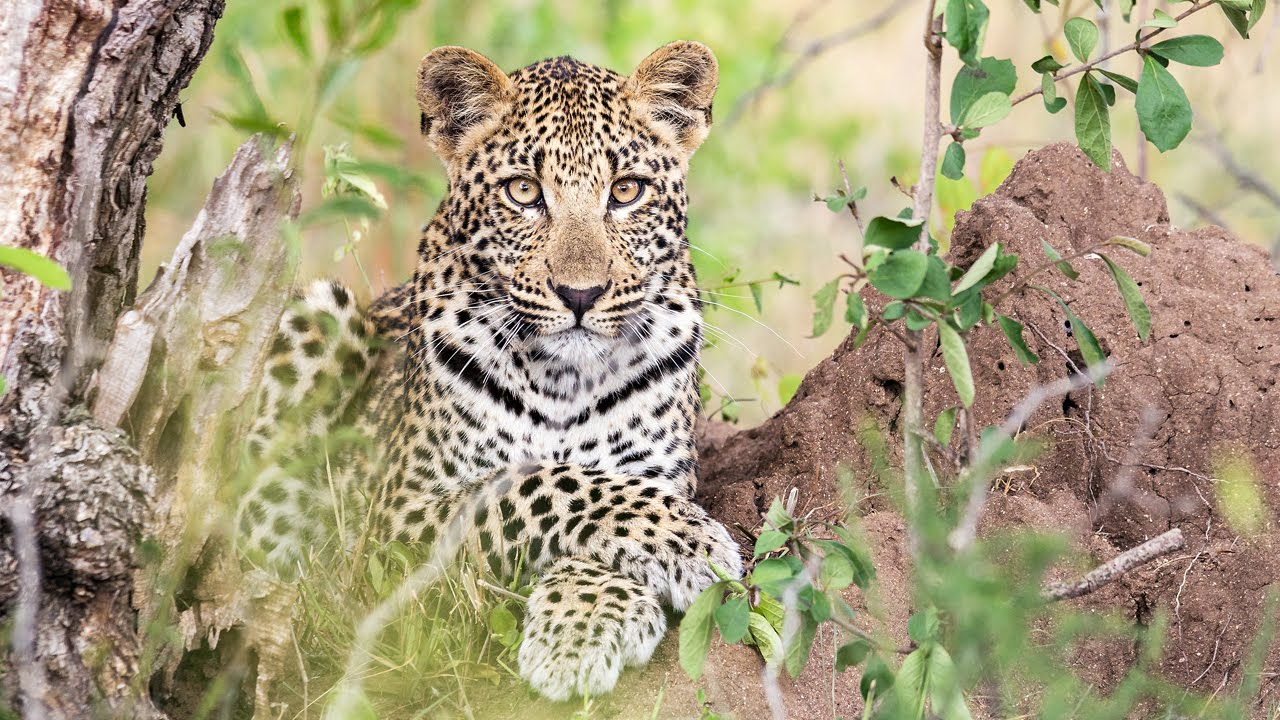

In [40]:
Image(filename=images[11], width=600)

In [47]:
test_pred = img_predict(process_img_path(images[11]))

In [50]:
test_pred[0]

('n02128385', 'leopard', 0.8464766)

In [51]:
# Instantiate metrics
best_guess = []
confidence = []

In [52]:
# Loop over images until it breaks
for img in images:
    pred = img_predict(process_img_path(img))
    best_guess.append(pred[0][1])
    confidence.append(pred[0][2])

OSError: cannot identify image file 'downloads/animal national park/18.Dudhwa-National-Park.jpg'

In [55]:
# how far did we get?
len(confidence)

10

In [59]:
# Add values for the missing image
best_guess.append("None")
confidence.append(0)

In [62]:
# Keep goin. . .
for img in images[11:]:
    pred = img_predict(process_img_path(img))
    best_guess.append(pred[0][1])
    confidence.append(pred[0][2])

In [75]:
# Send data to DF
df = pd.DataFrame(data={'image': images,
                        'guess': best_guess,
                        'confidence': confidence})

# Sort by confidence
df_sorted = df.sort_values(by='confidence', ascending=False)

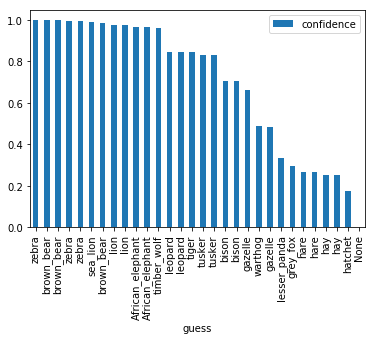

In [76]:
ax = df_sorted.plot.bar(x='guess', y='confidence')

Report both the most likely estimated class for any image, and also investigate (a) images where the classifier isn't that certain (the best estimate is low), and (b) images where the classifier fails.

Answer (in writing in the notebook) the following - "What sorts of images do CNN classifiers do well with? What sorts do they not do so well? And what are your hypotheses for why?"

### Estimated Class

In [82]:
df_sorted

,image,guess,confidence
3,downloads/animal national park/19.nairobi-nati...,zebra,0.999956
22,downloads/animal national park/8.a2d539ed-8489...,brown_bear,0.998591
13,downloads/animal national park/7.a2d539ed-8489...,brown_bear,0.998591
5,downloads/animal national park/10.zebras-in-ki...,zebra,0.997943
18,downloads/animal national park/9.zebras-in-kid...,zebra,0.997943
12,downloads/animal national park/4.elephant-seal...,sea_lion,0.991319
20,downloads/animal national park/13.spot-denali-...,brown_bear,0.985193
27,downloads/animal national park/16.Nairobi_Nati...,lion,0.977767
8,downloads/animal national park/17.Nairobi_Nati...,lion,0.977767
29,downloads/animal national park/6.addo-elephant...,African_elephant,0.967487


### Classifier is Uncertain

In [99]:
df_sorted[df_sorted['confidence'] <= 0.5][:-4]

,image,guess,confidence
19,downloads/animal national park/19.Gir-Forest-N...,warthog,0.486751
21,downloads/animal national park/8.7017_13_Rotwi...,gazelle,0.485687
7,downloads/animal national park/14.Bhutan-anima...,lesser_panda,0.334915
1,downloads/animal national park/2.2c7e0d75-c7ff...,grey_fox,0.294003
23,downloads/animal national park/15.2014-06-03-C...,hare,0.267200
15,downloads/animal national park/17.2014-06-03-C...,hare,0.267200


### Classifier Fails

In [100]:
df_sorted[-4:]

,image,guess,confidence
2,downloads/animal national park/14.Grizzly-DanR...,hay,0.253597
28,downloads/animal national park/20.Grizzly-DanR...,hay,0.253597
17,downloads/animal national park/3.ARK_6.jpg,hatchet,0.172665
10,downloads/animal national park/18.Dudhwa-Natio...,None,0.000000


### Response

Zebras, bears, sea lions and lions were the most confidently detected animals. The CNN can probably identify the stripe of a zebra, and the mane of a lion pretty easily.

A picture of a rhino broke the model, and a picture of an antelope was incorrectly identified as a hatchet. One picture of a bear was misidentified as hay (twice), but it seems that this is because a large portion of the picture contains hay.

It seems that the classifier works best on pictures where the animal has a distinct pattern/feature and the majority of the picture is populated by the animal(s).

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language